In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
name_list_1= ["Date","time","u","v","w","T","CO2","H2O"]
name_list_2= ['timestamp','SW_up','SW_low','LWUpper_semcorrtemp',
              'LWLower_semcorrtemp','CNR4TC','CNR4TK','Rn_SW',
              'Rn_LW','Albedo','Rn','LWUpper','LWLower',
              'PAR_Den','T_skin','Rain_mm']
name_list_3= ['Timestamp','Rain_mm','LWS','LWSdry','LWScon','LWSwet',
              'Tsolo_05','Tsolo_09','Tsolo_13','Tsolo_17',
              'Tsolo_21','Tsolo_30','Tsolo_34','Tsolo_38',
              'Fsolo_09','Fsolo_17','Fsolo_34','H2Osolo_09',
              'PA_us_09','H2Osolo_17','PA_us_17','H2Osolo_34',
              'PA_us_34','H2Osolo_60','PA_us_60','WaterContent',
              'WaterContent_01','WaterContent_02',
              'WaterContent_03','WaterContent_04','WaterContent_05',
              'WaterContent_06','WaterContent_08','WaterContent_10',
              'WaterContent_12','WaterContent_15','WaterContent_20']

df1 = pd.read_csv('Data/data20200721.dat',delim_whitespace=True,names=(name_list_1))
df2 = pd.read_csv('Data/SM_142_2020-07-21_0001.dat',header=None,names=(name_list_2))
df3 = pd.read_csv('Data/SM_143_2020-07-21_0001.dat',header=None,names=(name_list_3))

/var/folders/gs/zwmmp28x3fxdv4y3mz__qq280000gn/T/ipykernel_69092/93755327.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv('Data/data20200721.dat',delim_whitespace=True,names=(name_list_1))


In [3]:
df1

,Date,time,u,v,w,T,CO2,H2O
0,2020-07-21,00:00:00.1,1.193,0.798,-0.515,29.030,413.476,13.054
1,2020-07-21,00:00:00.2,1.276,0.881,-0.360,29.087,413.358,13.046
2,2020-07-21,00:00:00.3,1.478,0.919,-0.253,28.910,413.672,13.088
3,2020-07-21,00:00:00.4,1.302,1.102,-0.327,28.975,413.729,13.081
4,2020-07-21,00:00:00.5,1.159,0.927,-0.565,29.052,413.426,13.053
...,...,...,...,...,...,...,...,...
863976,2020-07-21,23:59:59.6,-0.120,-1.133,0.001,24.965,447.858,13.540
863977,2020-07-21,23:59:59.7,-0.128,-1.115,-0.006,24.944,447.775,13.540
863978,2020-07-21,23:59:59.8,-0.198,-1.094,-0.043,24.967,447.702,13.540
863979,2020-07-21,23:59:59.9,-0.219,-1.098,-0.036,24.861,447.709,13.542


# Q1

In [4]:
# convert from time to hour
df1['hour']=[(int(x[0:2]))+(int(x[3:5])/60)+(float(x[6:])/3600) for x in df1["time"].values[:]] 

# Calculate total wind
wind_tot_full = np.sqrt((df1['u']*df1['u'])+(df1['v']*df1['v'])+(df1['w']*df1['w']))

# create lists to hold 30 min averages
wind_tot_ave = []
temp_ave = []
co2_ave = []
q_ave = []
time_ave = []

# create 30 min averages
for i in range(48):
    time_start = i/2
    time_end = (i/2)+(0.5)
    df = df1[(df1['hour']>=time_start) & (df1['hour']<time_end)]
    wind_tot = np.sqrt((df['u']*df['u'])+(df['v']*df['v'])+(df['w']*df['w']))
    wind_tot_ave.append(wind_tot.mean())
    temp_ave.append(df['T'].mean())
    co2_ave.append(df['CO2'].mean())
    q_ave.append(df['H2O'].mean())

    time_ave.append((time_end+time_start)/2)


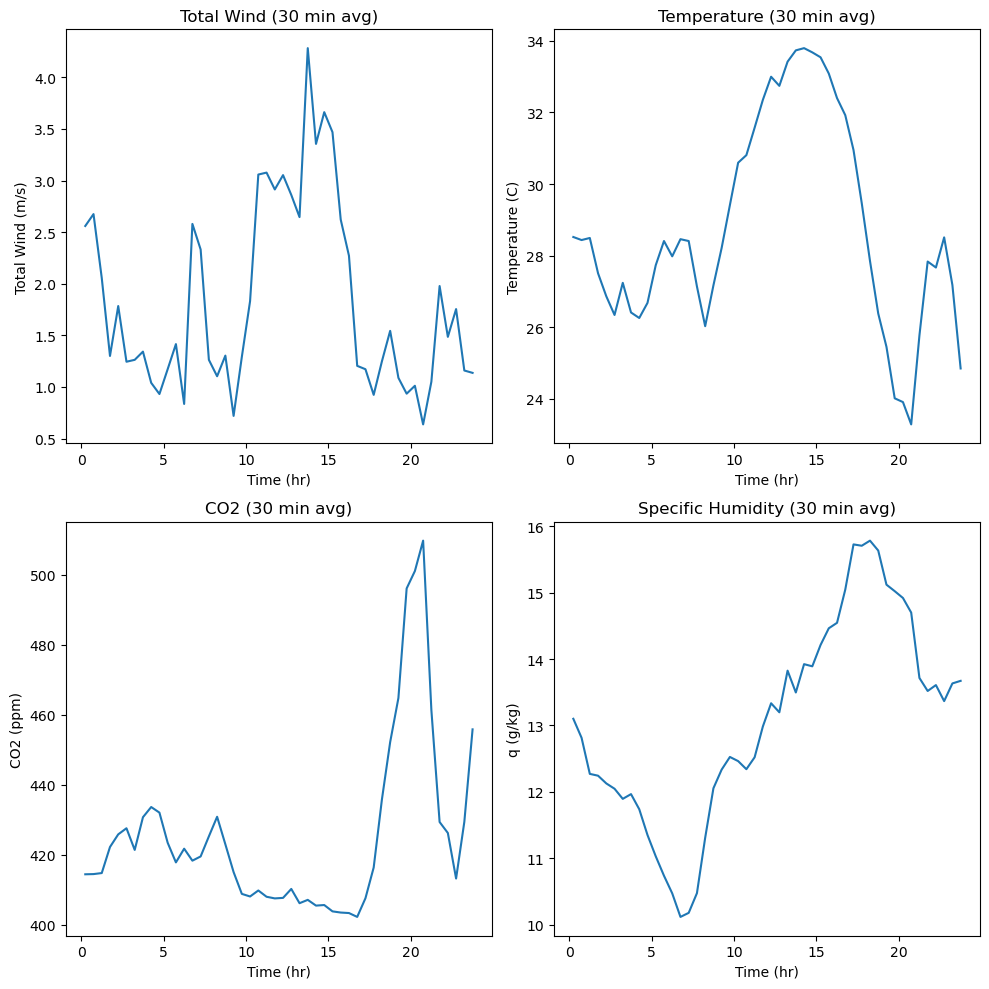

In [5]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

axs[0,0].plot(time_ave,wind_tot_ave)
axs[0,0].set_title('Total Wind (30 min avg)')
axs[0,0].set_xlabel('Time (hr)')
axs[0,0].set_ylabel('Total Wind (m/s)')

axs[0,1].plot(time_ave,temp_ave)
axs[0,1].set_title('Temperature (30 min avg)')
axs[0,1].set_xlabel('Time (hr)')
axs[0,1].set_ylabel('Temperature (C)')

axs[1,0].plot(time_ave,co2_ave)
axs[1,0].set_title('CO2 (30 min avg)')
axs[1,0].set_xlabel('Time (hr)')
axs[1,0].set_ylabel('CO2 (ppm)')

axs[1,1].plot(time_ave,q_ave)
axs[1,1].set_title('Specific Humidity (30 min avg)')
axs[1,1].set_xlabel('Time (hr)')
axs[1,1].set_ylabel('q (g/kg)')
plt.tight_layout()
plt.savefig("q1.png")
plt.show()
#plt.plot(wind_tot_full)

# Q2

In [6]:
# convert from time to hour
df1['hour']=[(int(x[0:2]))+(int(x[3:5])/60)+(float(x[6:])/3600) for x in df1["time"].values[:]] 

# Calculate total wind
wind_tot_full = np.sqrt((df1['u']*df1['u'])+(df1['v']*df1['v'])+(df1['w']*df1['w']))

# create lists to hold 5 min averages
wind_tot_ave_5 = []
tke_list_5 = []
uflux_5 = []
vflux_5 = []
tflux_5 = []
qflux_5 = []
cflux_5 = []
time_ave_5 = []
G_5=[]
# create lists to hold 30 min averages
wind_tot_ave_30 = []
tke_list_30 = []
uflux_30 = []
vflux_30 = []
tflux_30 = []
qflux_30 = []
cflux_30 = []
time_ave_30 = []
G_5=[]

avg_period_min = 5
avg_period = avg_period_min/60
tot_periods=int(24/avg_period)

# create 5 min averages
for i in range(tot_periods):
    time_start = i*avg_period
    time_end = (i*avg_period)+(avg_period)
    df = df1[(df1['hour']>=time_start) & (df1['hour']<time_end)]

    uprime=df['u']-df['u'].mean()
    vprime=df['v']-df['v'].mean()
    wprime=df['w']-df['w'].mean()

    tprime=df['T']-df['T'].mean()
    qprime=df['H2O']-df['H2O'].mean()
    co2prime=df['CO2']-df['CO2'].mean()

    TKE = 0.5*(uprime**2 + vprime**2 + wprime**2)

    uprimewprime = uprime*wprime
    vprimewprime = vprime*wprime
    tprimewprime = tprime*wprime
    qprimewprime = qprime*wprime
    co2primewprime = co2prime*wprime

    tke_list_5.append(TKE.mean())
    uflux_5.append(uprimewprime.mean())
    vflux_5.append(vprimewprime.mean())
    tflux_5.append(tprimewprime.mean())
    qflux_5.append(qprimewprime.mean())
    cflux_5.append(co2primewprime.mean())

    time_ave_5.append((time_end+time_start)/2)


avg_period_min = 30
avg_period = avg_period_min/60
tot_periods=int(24/avg_period)

    # create 30 min averages
for i in range(tot_periods):
    time_start = i*avg_period
    time_end = (i*avg_period)+(avg_period)
    df = df1[(df1['hour']>=time_start) & (df1['hour']<time_end)]

    uprime=df['u']-df['u'].mean()
    vprime=df['v']-df['v'].mean()
    wprime=df['w']-df['w'].mean()

    tprime=df['T']-df['T'].mean()
    qprime=df['H2O']-df['H2O'].mean()
    co2prime=df['CO2']-df['CO2'].mean()

    TKE = 0.5*(uprime**2 + vprime**2 + wprime**2)

    uprimewprime = uprime*wprime
    vprimewprime = vprime*wprime
    tprimewprime = tprime*wprime
    qprimewprime = qprime*wprime
    co2primewprime = co2prime*wprime

    tke_list_30.append(TKE.mean())
    uflux_30.append(uprimewprime.mean())
    vflux_30.append(vprimewprime.mean())
    tflux_30.append(tprimewprime.mean())
    qflux_30.append(qprimewprime.mean())
    cflux_30.append(co2primewprime.mean())

    time_ave_30.append((time_end+time_start)/2)

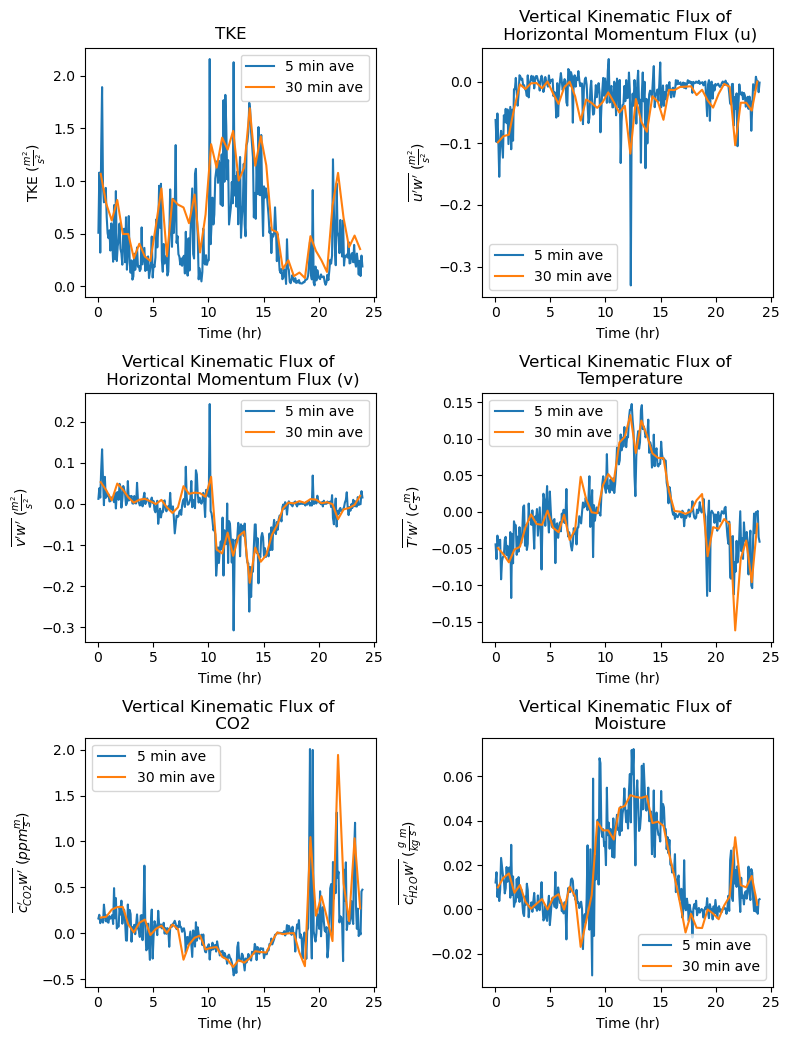

In [7]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(8,10.5))

axs[0,0].plot(time_ave_5,tke_list_5,label='5 min ave')
axs[0,0].plot(time_ave_30,tke_list_30,label='30 min ave')
axs[0,0].set_title('TKE')
axs[0,0].set_xlabel('Time (hr)')
axs[0,0].set_ylabel(r'TKE ($\frac{m^2}{s^2}$)')
axs[0,0].legend()

axs[0,1].plot(time_ave_5,uflux_5,label='5 min ave')
axs[0,1].plot(time_ave_30,uflux_30,label='30 min ave')
axs[0,1].set_title('Vertical Kinematic Flux of \n Horizontal Momentum Flux (u)')
axs[0,1].set_xlabel('Time (hr)')
axs[0,1].set_ylabel(r'$\overline{u^{\prime}w^{\prime}}$ ($\frac{m^2}{s^2}$)')
axs[0,1].legend()
 
axs[1,0].plot(time_ave_5,vflux_5,label='5 min ave')
axs[1,0].plot(time_ave_30,vflux_30,label='30 min ave')
axs[1,0].set_title('Vertical Kinematic Flux of \n Horizontal Momentum Flux (v)')
axs[1,0].set_xlabel('Time (hr)')
axs[1,0].set_ylabel(r'$\overline{v^{\prime}w^{\prime}}$ ($\frac{m^2}{s^2}$)')
axs[1,0].legend()
 
axs[1,1].plot(time_ave_5,tflux_5,label='5 min ave')
axs[1,1].plot(time_ave_30,tflux_30,label='30 min ave')
axs[1,1].set_title('Vertical Kinematic Flux of \n Temperature')
axs[1,1].set_xlabel('Time (hr)')
axs[1,1].set_ylabel(r'$\overline{T^{\prime}w^{\prime}}$ ($c \frac{m}{s}$)')
axs[1,1].legend()
 
axs[2,0].plot(time_ave_5,cflux_5,label='5 min ave')
axs[2,0].plot(time_ave_30,cflux_30,label='30 min ave')
axs[2,0].set_title('Vertical Kinematic Flux of \n CO2')
axs[2,0].set_xlabel('Time (hr)')
axs[2,0].set_ylabel(r'$\overline{c_{CO2}^{\prime}w^{\prime}}$ ($ppm\frac{m}{s}$)')
axs[2,0].legend()

axs[2,1].plot(time_ave_5,qflux_5,label='5 min ave')
axs[2,1].plot(time_ave_30,qflux_30,label='30 min ave')
axs[2,1].set_title('Vertical Kinematic Flux of \n Moisture')
axs[2,1].set_xlabel('Time (hr)')
axs[2,1].set_ylabel(r'$\overline{c_{H2O}^{\prime}w^{\prime}}$ ($\frac{g}{kg}\frac{m}{s}$)')
axs[2,1].legend()
plt.tight_layout()

plt.savefig('q2.png')
plt.show()

# Q3

In [8]:
L_up = -df2['LWLower'][:-1]
L_down = df2['LWUpper'][:-1]
S_up = -df2['SW_low'][:-1]
S_down = df2['SW_up'][:-1]

df2['hour']=[(int(x[11:13]))+(int(x[14:16])/60)+(float(x[17:])/3600) for x in df2["timestamp"].values[:]]  
time_rad = df2['hour'][:-1]

net_rad = L_up + L_down + S_up + S_down

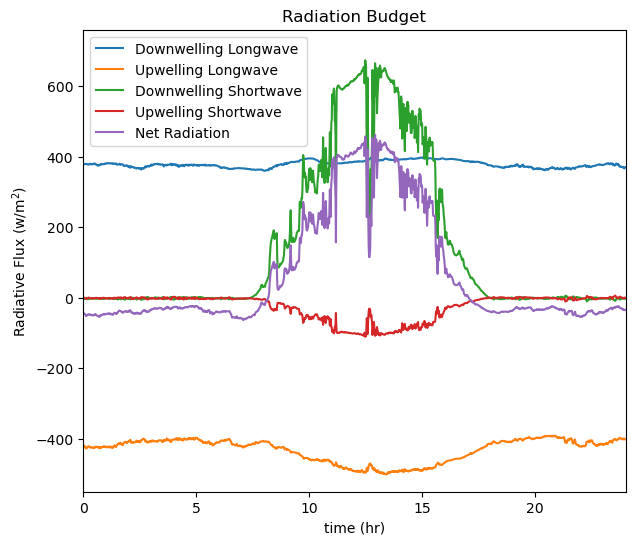

In [9]:
fig=plt.figure(figsize=(7,6))

plt.plot(time_rad,L_down,label='Downwelling Longwave')
plt.plot(time_rad,L_up,label='Upwelling Longwave')
plt.plot(time_rad,S_down,label='Downwelling Shortwave')
plt.plot(time_rad,S_up,label='Upwelling Shortwave')
plt.plot(time_rad,net_rad,label='Net Radiation')
plt.title('Radiation Budget')
plt.ylabel(r'Radiative Flux (w/m$^{2}$)')
plt.xlabel("time (hr)")
plt.ylim(-550,760)
plt.xlim(0,24)
plt.legend()
plt.savefig('q3.png')


# Q4

In [10]:
# get soil flux in 5 min and 30 min averages
# convert from time to hour
df3['hour']=[(int(x[11:13]))+(int(x[14:16])/60)+(float(x[17:])/3600) for x in df3["Timestamp"].values[:]]

# create lists to hold 5 min averages
G_5=[]
R_n_5=[]
time_ave_5=[]
# create lists to hold 30 min averages
G_30=[]
R_n_30=[]
time_ave_30=[]

avg_period_min = 5
avg_period = avg_period_min/60
tot_periods=int(24/avg_period)

# create 5 min averages
for i in range(tot_periods):
    time_start = i*avg_period
    time_end = (i*avg_period)+(avg_period)
    df = df3[(df3['hour']>=time_start) & (df3['hour']<time_end)]
    df_rn = df2[(df2['hour']>=time_start) & (df2['hour']<time_end)]

    R_n_5.append(df_rn['Rn'].mean())
    G_5.append(df['Fsolo_09'].mean())

    time_ave_5.append((time_end+time_start)/2)
G_5 = np.array(G_5)
R_n_5 = np.array(R_n_5)
time_ave_5 = np.array(time_ave_5)


avg_period_min = 30
avg_period = avg_period_min/60
tot_periods=int(24/avg_period)

# create 30 min averages
for i in range(tot_periods):
    time_start = i*avg_period
    time_end = (i*avg_period)+(avg_period)
    df = df3[(df3['hour']>=time_start) & (df3['hour']<time_end)]
    df_rn = df2[(df2['hour']>=time_start) & (df2['hour']<time_end)]

    R_n_30.append(df_rn['Rn'].mean())
    G_30.append(df['Fsolo_09'].mean())

    time_ave_30.append((time_end+time_start)/2)
G_30 = np.array(G_30)
R_n_30 = np.array(R_n_30)
time_ave_30=np.array(time_ave_30)



In [11]:
rho = 1.17
c_p = 1005
L_v = 2500


H_5  = rho*c_p*np.array(tflux_5)
H_30 = rho*c_p*np.array(tflux_30)
LE_5 = rho*L_v*np.array(qflux_5)
LE_30= rho*L_v*np.array(qflux_30)

#R_n_5 = G_5+H_5+LE_5
#R_n_30= G_30+H_30+LE_30

R_n_test_5 = G_5+H_5+LE_5
R_n_test_30 = G_30+H_30+LE_30


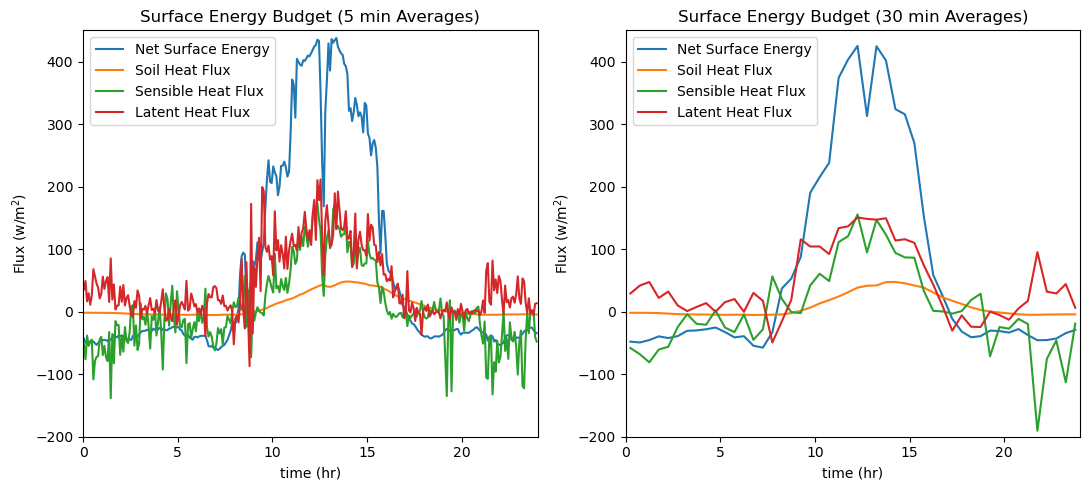

In [12]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(11,5))

#axs[0].plot(time_ave_5,G_5+H_5+LE_5)
axs[0].plot(time_ave_5,R_n_5,label='Net Surface Energy')
axs[0].plot(time_ave_5,G_5,label='Soil Heat Flux')
axs[0].plot(time_ave_5,H_5,label='Sensible Heat Flux')
axs[0].plot(time_ave_5,LE_5,label='Latent Heat Flux')
axs[0].legend()
axs[0].set_title('Surface Energy Budget (5 min Averages)')
axs[0].set_xlim((0,24))
axs[0].set_ylim((-200,450))
axs[0].set_ylabel(r'Flux (w/m$^{2}$)')
axs[0].set_xlabel('time (hr)')


#axs[1].plot(time_ave_30,G_30+H_30+LE_30)
axs[1].plot(time_ave_30,R_n_30,label='Net Surface Energy')
axs[1].plot(time_ave_30,G_30,label='Soil Heat Flux')
axs[1].plot(time_ave_30,H_30,label='Sensible Heat Flux')
axs[1].plot(time_ave_30,LE_30,label='Latent Heat Flux')
axs[1].legend()
axs[1].set_title('Surface Energy Budget (30 min Averages)')
axs[1].set_xlim((0,24))
axs[1].set_ylim((-200,450))
axs[1].set_ylabel(r'Flux (w/m$^{2}$)')
axs[1].set_xlabel('time (hr)')
plt.tight_layout()
plt.savefig('q4.png')



# Q5

In [13]:
# Split the data into day and night
# according to google sunrise for this date was 7:26 am local time and sunset was 5:57 pm local time
sunrise_time= 10+(26/60)
sunset_time= 20+(57/60)

# get indicies of day time and night time for 5min and 30min averages
day_5 = np.where((time_ave_5>sunrise_time) & (time_ave_5<sunset_time))[0]
night_5 = np.where(np.logical_not((time_ave_5>sunrise_time) & (time_ave_5<sunset_time)))[0]

day_30 = np.where((time_ave_30>sunrise_time) & (time_ave_30<sunset_time))[0]
night_30 = np.where(np.logical_not((time_ave_30>sunrise_time) & (time_ave_30<sunset_time)))[0]

# seperate the surface energy budget terms into day and night variabels
day_R_n_5 = R_n_5[day_5]
day_G_5 = G_5[day_5]
day_H_5 = H_5[day_5]
day_LE_5 = LE_5[day_5]

day_R_n_30 = R_n_30[day_30]
day_G_30 = G_30[day_30]
day_H_30 = H_30[day_30]
day_LE_30 = LE_30[day_30]

night_R_n_5 = R_n_5[night_5]
night_G_5 = G_5[night_5]
night_H_5 = H_5[night_5]
night_LE_5 = LE_5[night_5]

night_R_n_30 = R_n_30[night_30]
night_G_30 = G_30[night_30]
night_H_30 = H_30[night_30]
night_LE_30 = LE_30[night_30]



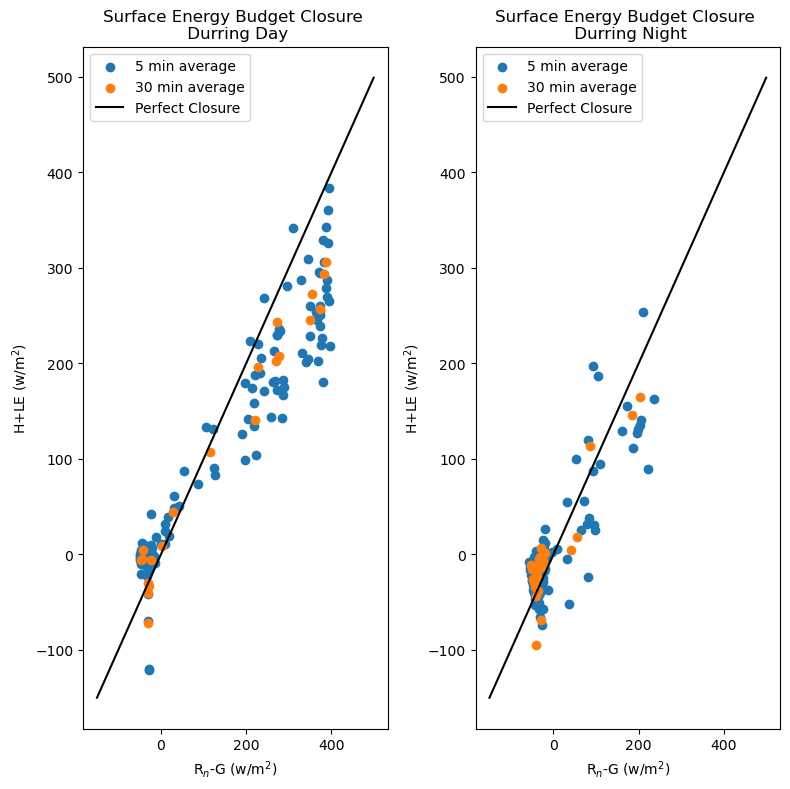

In [14]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(8,8))

axs[0].scatter(day_R_n_5-day_G_5,day_H_5+day_LE_5,label='5 min average')
axs[0].scatter(day_R_n_30-day_G_30,day_H_30+day_LE_30,label='30 min average')
axs[0].plot(np.arange(-150,500),np.arange(-150,500),c='k',label='Perfect Closure')
axs[0].legend()
axs[0].set_title("Surface Energy Budget Closure \n Durring Day")
axs[0].set_xlabel(r'R$_n$-G (w/m$^{2}$)')
axs[0].set_ylabel(r'H+LE (w/m$^{2}$)')

axs[1].scatter(night_R_n_5-night_G_5,night_H_5+night_LE_5,label='5 min average')
axs[1].scatter(night_R_n_30-night_G_30,night_H_30+night_LE_30,label='30 min average')
axs[1].plot(np.arange(-150,500),np.arange(-150,500),c='k',label='Perfect Closure')
axs[1].legend()
axs[1].set_xlabel(r'R$_n$-G (w/m$^{2}$)')
axs[1].set_ylabel(r'H+LE (w/m$^{2}$)')

axs[1].set_title("Surface Energy Budget Closure \n Durring Night")

plt.tight_layout()

plt.savefig('q5_uncorrected.png')

# Attempt to correct soil phase offset
As noted in class the soil flux is slightly lagging the other variables in the surface energy budget. To attempt to correct this it would make the most sense to allign the maximum values of all of the variables. This is not straightforward in this case sense there is a drop in the radiation and therfore surface energy budget right near the peak of heating. This could be caused by clouds or possibly operational issues that I am ignorant of like the shadow of the tower that day or any number of other potential reasons. Cause aside, I decided to instead attempt to allighn the bottom of the drop for all of the variables instead of alligning the peaks of the variables. This was done manually, resulting in an estimated offset of approximatly 15 minutes between the soil flux and the other fluxes. To correct this offset, the soil flux data was shifted back by 3 positions in the 5 minute averaged data and shifted back by 30 minutes in the 30 minute average.

In [15]:
np.where(R_n_5==168.5135)

(array([152]),)

In [16]:
np.where(G_5==39.736986)

(array([155]),)

In [17]:
G_5_correction = []
for i in range(len(G_5)):
    if (i+3)<len(G_5):
        G_5_correction.append(G_5[i+3])
    else:
        G_5_correction.append(G_5[i])
G_5_correction=np.array(G_5_correction)

G_30_correction = []
for i in range(len(G_30)):
    if (i+1)<len(G_30):
        G_30_correction.append(G_30[i+1])
    else:
        G_30_correction.append(G_30[i])
G_30_correction=np.array(G_30_correction)


In [18]:
# Split the data into day and night
# according to google sunrise for this date was 7:26 am local time and sunset was 5:57 pm local time
sunrise_time= 10+(26/60)
sunset_time= 20+(57/60)


# get indicies of day time and night time for 5min and 30min averages
day_5 = np.where((time_ave_5>sunrise_time) & (time_ave_5<sunset_time))[0]
night_5 = np.where(np.logical_not((time_ave_5>sunrise_time) & (time_ave_5<sunset_time)))[0]

day_30 = np.where((time_ave_30>sunrise_time) & (time_ave_30<sunset_time))[0]
night_30 = np.where(np.logical_not((time_ave_30>sunrise_time) & (time_ave_30<sunset_time)))[0]


# seperate the surface energy budget terms into day and night variabels
day_R_n_5 = R_n_5[day_5]
day_G_5_correction = G_5_correction[day_5]
day_H_5 = H_5[day_5]
day_LE_5 = LE_5[day_5]

day_R_n_30 = R_n_30[day_30]
day_G_30_correction = G_30_correction[day_30]
day_H_30 = H_30[day_30]
day_LE_30 = LE_30[day_30]

night_R_n_5 = R_n_5[night_5]
night_G_5_correction = G_5_correction[night_5]
night_H_5 = H_5[night_5]
night_LE_5 = LE_5[night_5]

night_R_n_30 = R_n_30[night_30]
night_G_30_correction = G_30_correction[night_30]
night_H_30 = H_30[night_30]
night_LE_30 = LE_30[night_30]



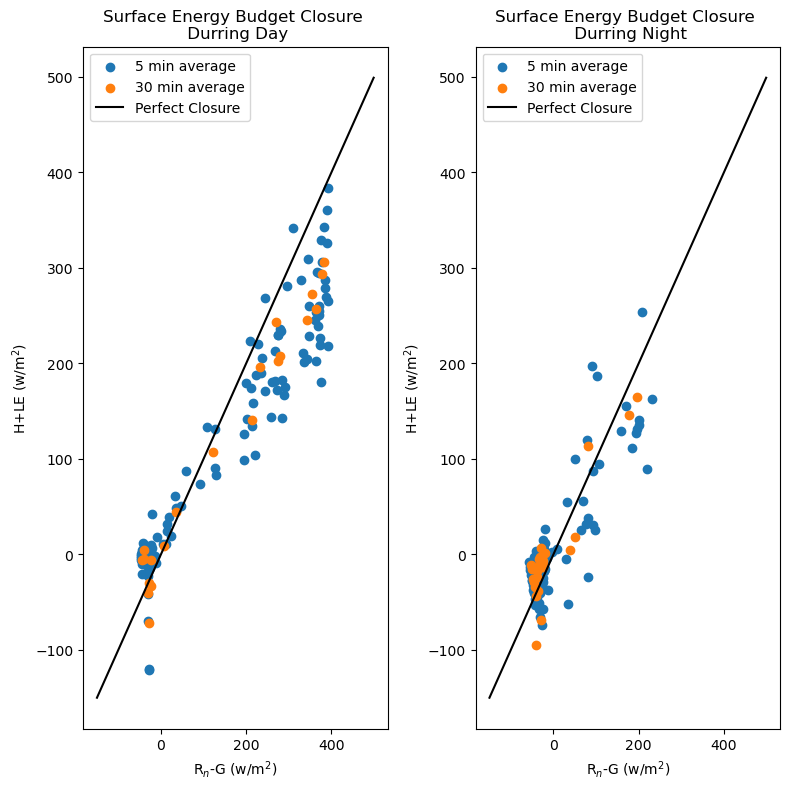

In [19]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(8,8))

axs[0].scatter(day_R_n_5-day_G_5_correction,day_H_5+day_LE_5,label='5 min average')
axs[0].scatter(day_R_n_30-day_G_30_correction,day_H_30+day_LE_30,label='30 min average')
axs[0].plot(np.arange(-150,500),np.arange(-150,500),c='k',label='Perfect Closure')
axs[0].legend()
axs[0].set_title("Surface Energy Budget Closure \n Durring Day")
axs[0].set_xlabel(r'R$_n$-G (w/m$^{2}$)')
axs[0].set_ylabel(r'H+LE (w/m$^{2}$)')

axs[1].scatter(night_R_n_5-night_G_5_correction,night_H_5+night_LE_5,label='5 min average')
axs[1].scatter(night_R_n_30-night_G_30_correction,night_H_30+night_LE_30,label='30 min average')
axs[1].plot(np.arange(-150,500),np.arange(-150,500),c='k',label='Perfect Closure')
axs[1].legend()
axs[1].set_xlabel(r'R$_n$-G (w/m$^{2}$)')
axs[1].set_ylabel(r'H+LE (w/m$^{2}$)')

axs[1].set_title("Surface Energy Budget Closure \n Durring Night")

plt.tight_layout()

plt.savefig('q5_uncorrected.png')

plt.savefig('q5_corrected.png')

In [20]:
G_5_correction-G_5

array([ 4.91569400e-01, -9.15762000e-02, -7.66810000e-02, -6.08366000e-02,
       -4.39216000e-02, -3.16844000e-02, -4.69482000e-02, -5.07444000e-02,
       -4.75940000e-02, -2.57630000e-02, -4.85436000e-02, -7.04026000e-02,
       -9.77138000e-02, -9.00986000e-02, -9.87140000e-02, -9.76826000e-02,
       -1.42334600e-01, -1.81495600e-01, -2.45541000e-01, -2.84008200e-01,
       -3.36554600e-01, -3.79508000e-01, -4.32631000e-01, -4.85504000e-01,
       -5.16391400e-01, -5.12067400e-01, -4.72320400e-01, -4.24580400e-01,
       -4.09216200e-01, -3.96185000e-01, -4.26261000e-01, -4.14354000e-01,
       -3.79086600e-01, -2.80953600e-01, -1.94982800e-01, -1.14035400e-01,
       -7.38604000e-02, -3.95670000e-02, -3.04090000e-02, -3.47410000e-02,
       -2.77448000e-02, -3.37988000e-02, -3.91834000e-02, -6.26960000e-02,
       -7.09146000e-02, -3.41254000e-02, -4.20620000e-02, -4.23582000e-02,
       -9.03578000e-02, -8.91932000e-02, -1.17610000e-01, -1.29804000e-01,
       -1.52857800e-01, -

# Looking at closure residual as a function of net

In [28]:

res_5_day = (day_R_n_5-day_G_5-day_H_5-day_LE_5)
res_30_day = (day_R_n_30-day_G_30-day_H_30-day_LE_30)

res_5_night = (night_R_n_5-night_G_5-night_H_5-night_LE_5)
res_30_night = (night_R_n_30-night_G_30-night_H_30-night_LE_30)

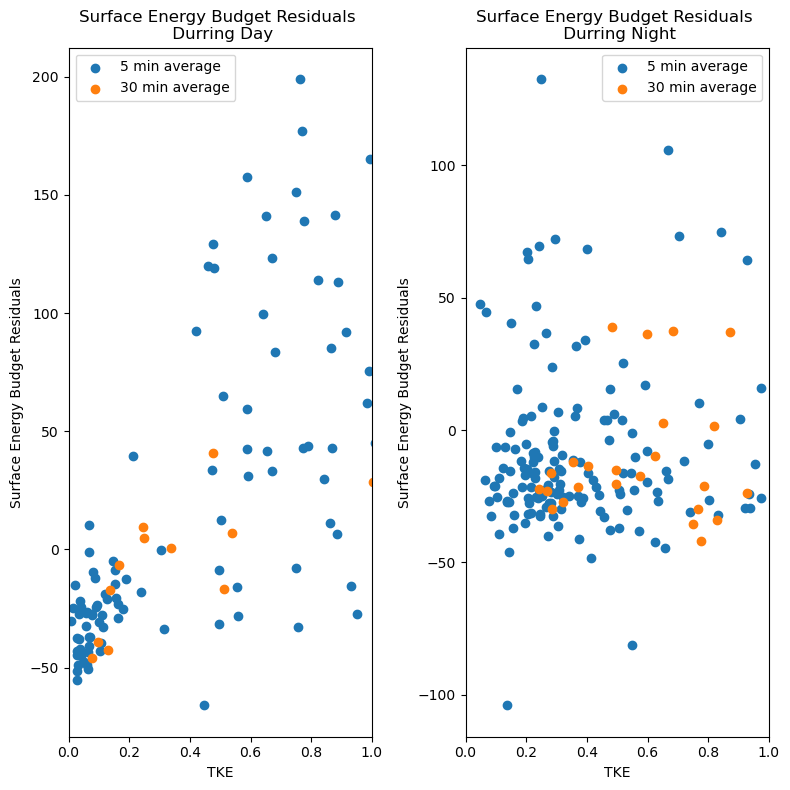

In [53]:





fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(8,8))

axs[0].scatter(np.array(tke_list_5)[day_5],res_5_day,label='5 min average')
axs[0].scatter(np.array(tke_list_30)[day_30],res_30_day,label='30 min average')
#axs[0].plot([-60,400],[0,0],c='k',label='Perfect Closure')
axs[0].legend()
axs[0].set_title("Surface Energy Budget Residuals \n Durring Day")
axs[0].set_xlabel(r'TKE')
axs[0].set_ylabel(r'Surface Energy Budget Residuals')
axs[0].set_xlim(0.0,1)

axs[1].scatter(np.array(tke_list_5)[night_5],res_5_night,label='5 min average')
axs[1].scatter(np.array(tke_list_30)[night_30],res_30_night,label='30 min average')
#axs[1].plot([-60,400],[0,0],c='k',label='Perfect Closure')
axs[1].legend()
axs[1].set_xlabel(r'TKE')
axs[1].set_ylabel(r'Surface Energy Budget Residuals')
axs[1].set_xlim(0.0,1)

axs[1].set_title("Surface Energy Budget Residuals \n Durring Night")

plt.tight_layout()

plt.savefig('q5_residuals.png')

In [41]:
np.array(tke_list_5)[day_5.tolist()]

array([0.58717425, 0.68135339, 1.023499  , 1.09250038, 1.18793444,
       0.98251715, 1.19149542, 1.13990514, 0.77692051, 1.25250863,
       0.76226011, 1.76776709, 0.99276499, 1.81800087, 1.52224551,
       1.01592136, 1.19840117, 0.58680519, 0.66952764, 0.75060174,
       0.99002134, 0.78785279, 2.12795978, 0.86241661, 1.04385654,
       0.75741135, 1.08851482, 0.5887775 , 1.00829559, 1.22825821,
       0.46046383, 0.64929875, 0.77068832, 1.16311324, 0.59092823,
       0.47515096, 1.33793602, 1.37593593, 1.46656865, 1.742976  ,
       1.6760413 , 1.4664822 , 1.35040958, 1.22424993, 0.65445205,
       0.88723667, 0.64095233, 1.20200922, 0.87735011, 1.51224445,
       0.86932803, 0.86495371, 1.4373094 , 0.82149403, 0.47764322,
       0.94918167, 0.84179248, 0.93020405, 0.88387059, 0.77362201,
       0.66903755, 0.50829959, 0.55670636, 0.31540481, 0.49601256,
       0.4718673 , 0.50121472, 0.74979936, 0.55402583, 0.23891571,
       0.49443928, 0.30443255, 0.15203346, 0.12732486, 0.16364

In [39]:
day_5.tolist()

[125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250]